# Anomaly Detection

### Importing the Necessary Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.datasets import get_data
from pycaret.anomaly import *
mpl.rcParams['figure.dpi'] = 300

### Loading the Dataset

In [152]:
replace_dict = { "Channel": {1: "Horeca", 2: "Retail"},
            "Region":  {1: "Lisbon", 2: "Oporto", 3: "Other"} }

data = get_data('wholesale', verbose = False)
data.replace(replace_dict, inplace = True) 

data.head()

Channel Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  Retail  Other  12669  9656     7561     214              2674        1338
1  Retail  Other   7057  9810     9568    1762              3293        1776
2  Retail  Other   6353  8808     7684    2405              3516        7844
3  Horeca  Other  13265  1196     4221    6404               507        1788
4  Retail  Other  22615  5410     7198    3915              1777        5185

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicassen        440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 27.6+ KB


### Exploratory Data Analysis

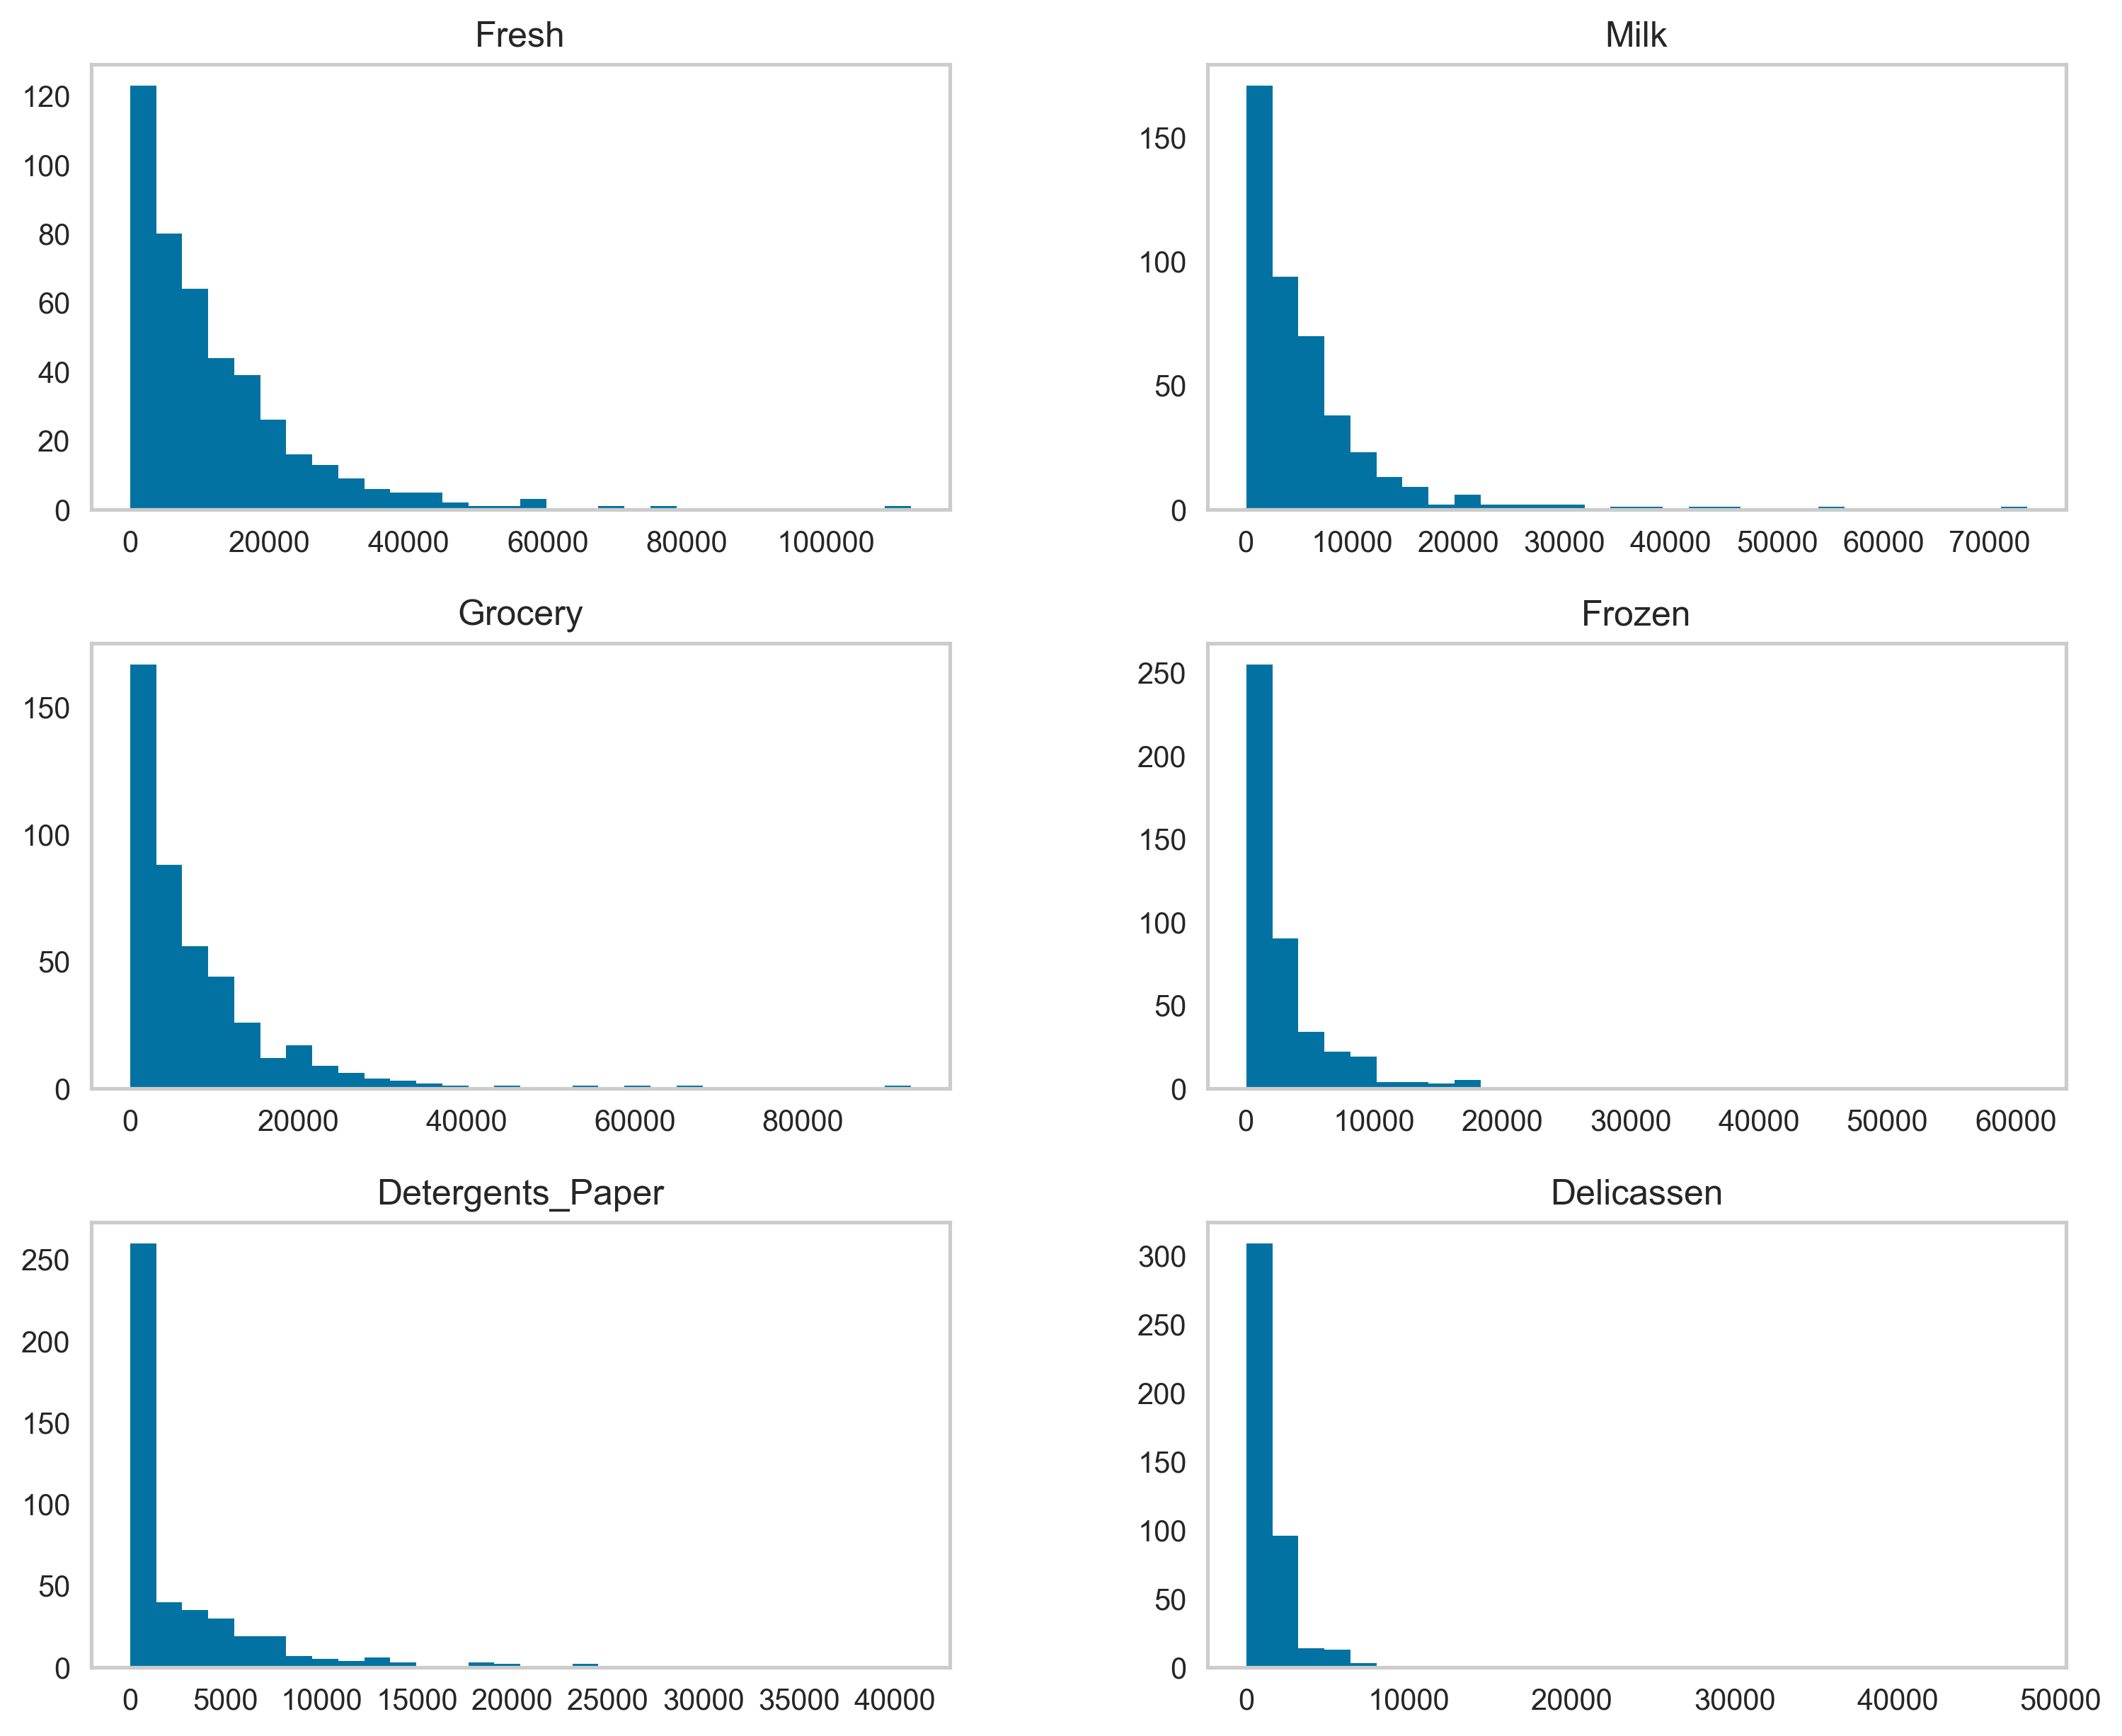

Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

In [148]:
numeric = ['Fresh', 'Milk', 'Grocery', 'Frozen',
           'Detergents_Paper', 'Delicassen']

categorical = ['Channel', 'Region']

data[numeric].hist(bins=30, figsize = (12,10), grid = False)
plt.show()

data[numeric].skew()

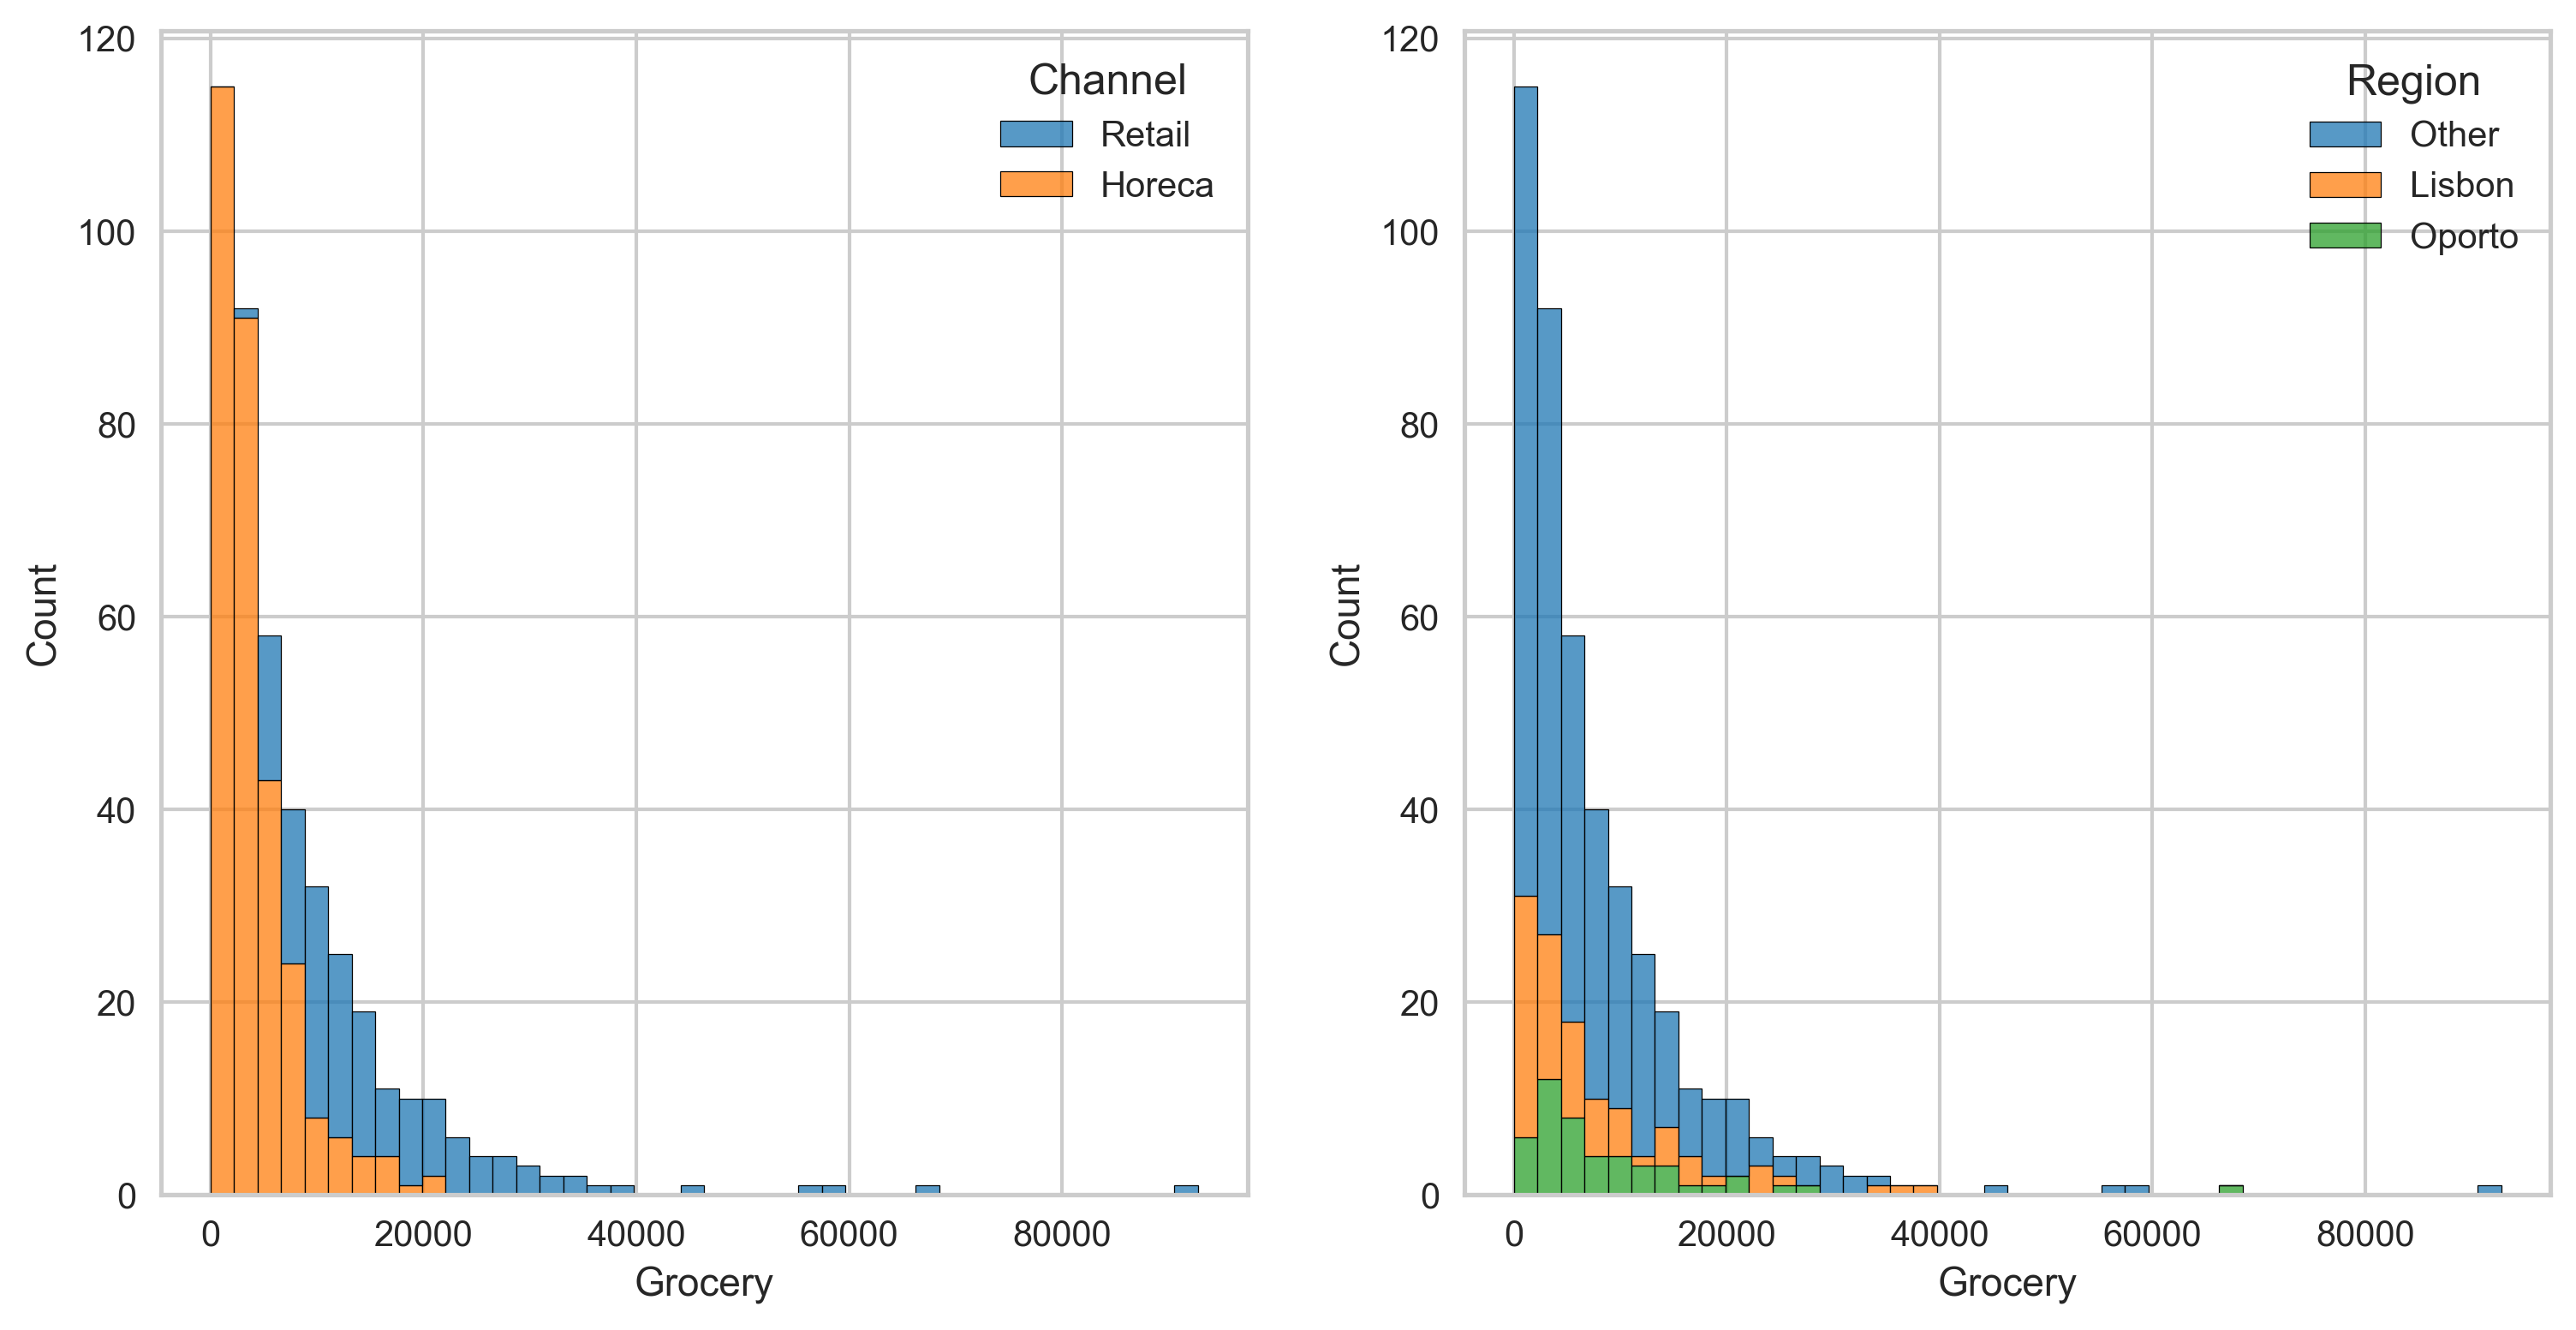

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (12,6))

for ax, col in zip(axes.flatten(), categorical):
    sns.histplot(data=data, x ='Grocery', palette = 'tab10',
                 hue=col, multiple='stack', ax=ax)

plt.show()

In [25]:
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(data=data[numeric], orient='h', ax = ax)
ax.set_xlim(0, 60000)

plt.show()

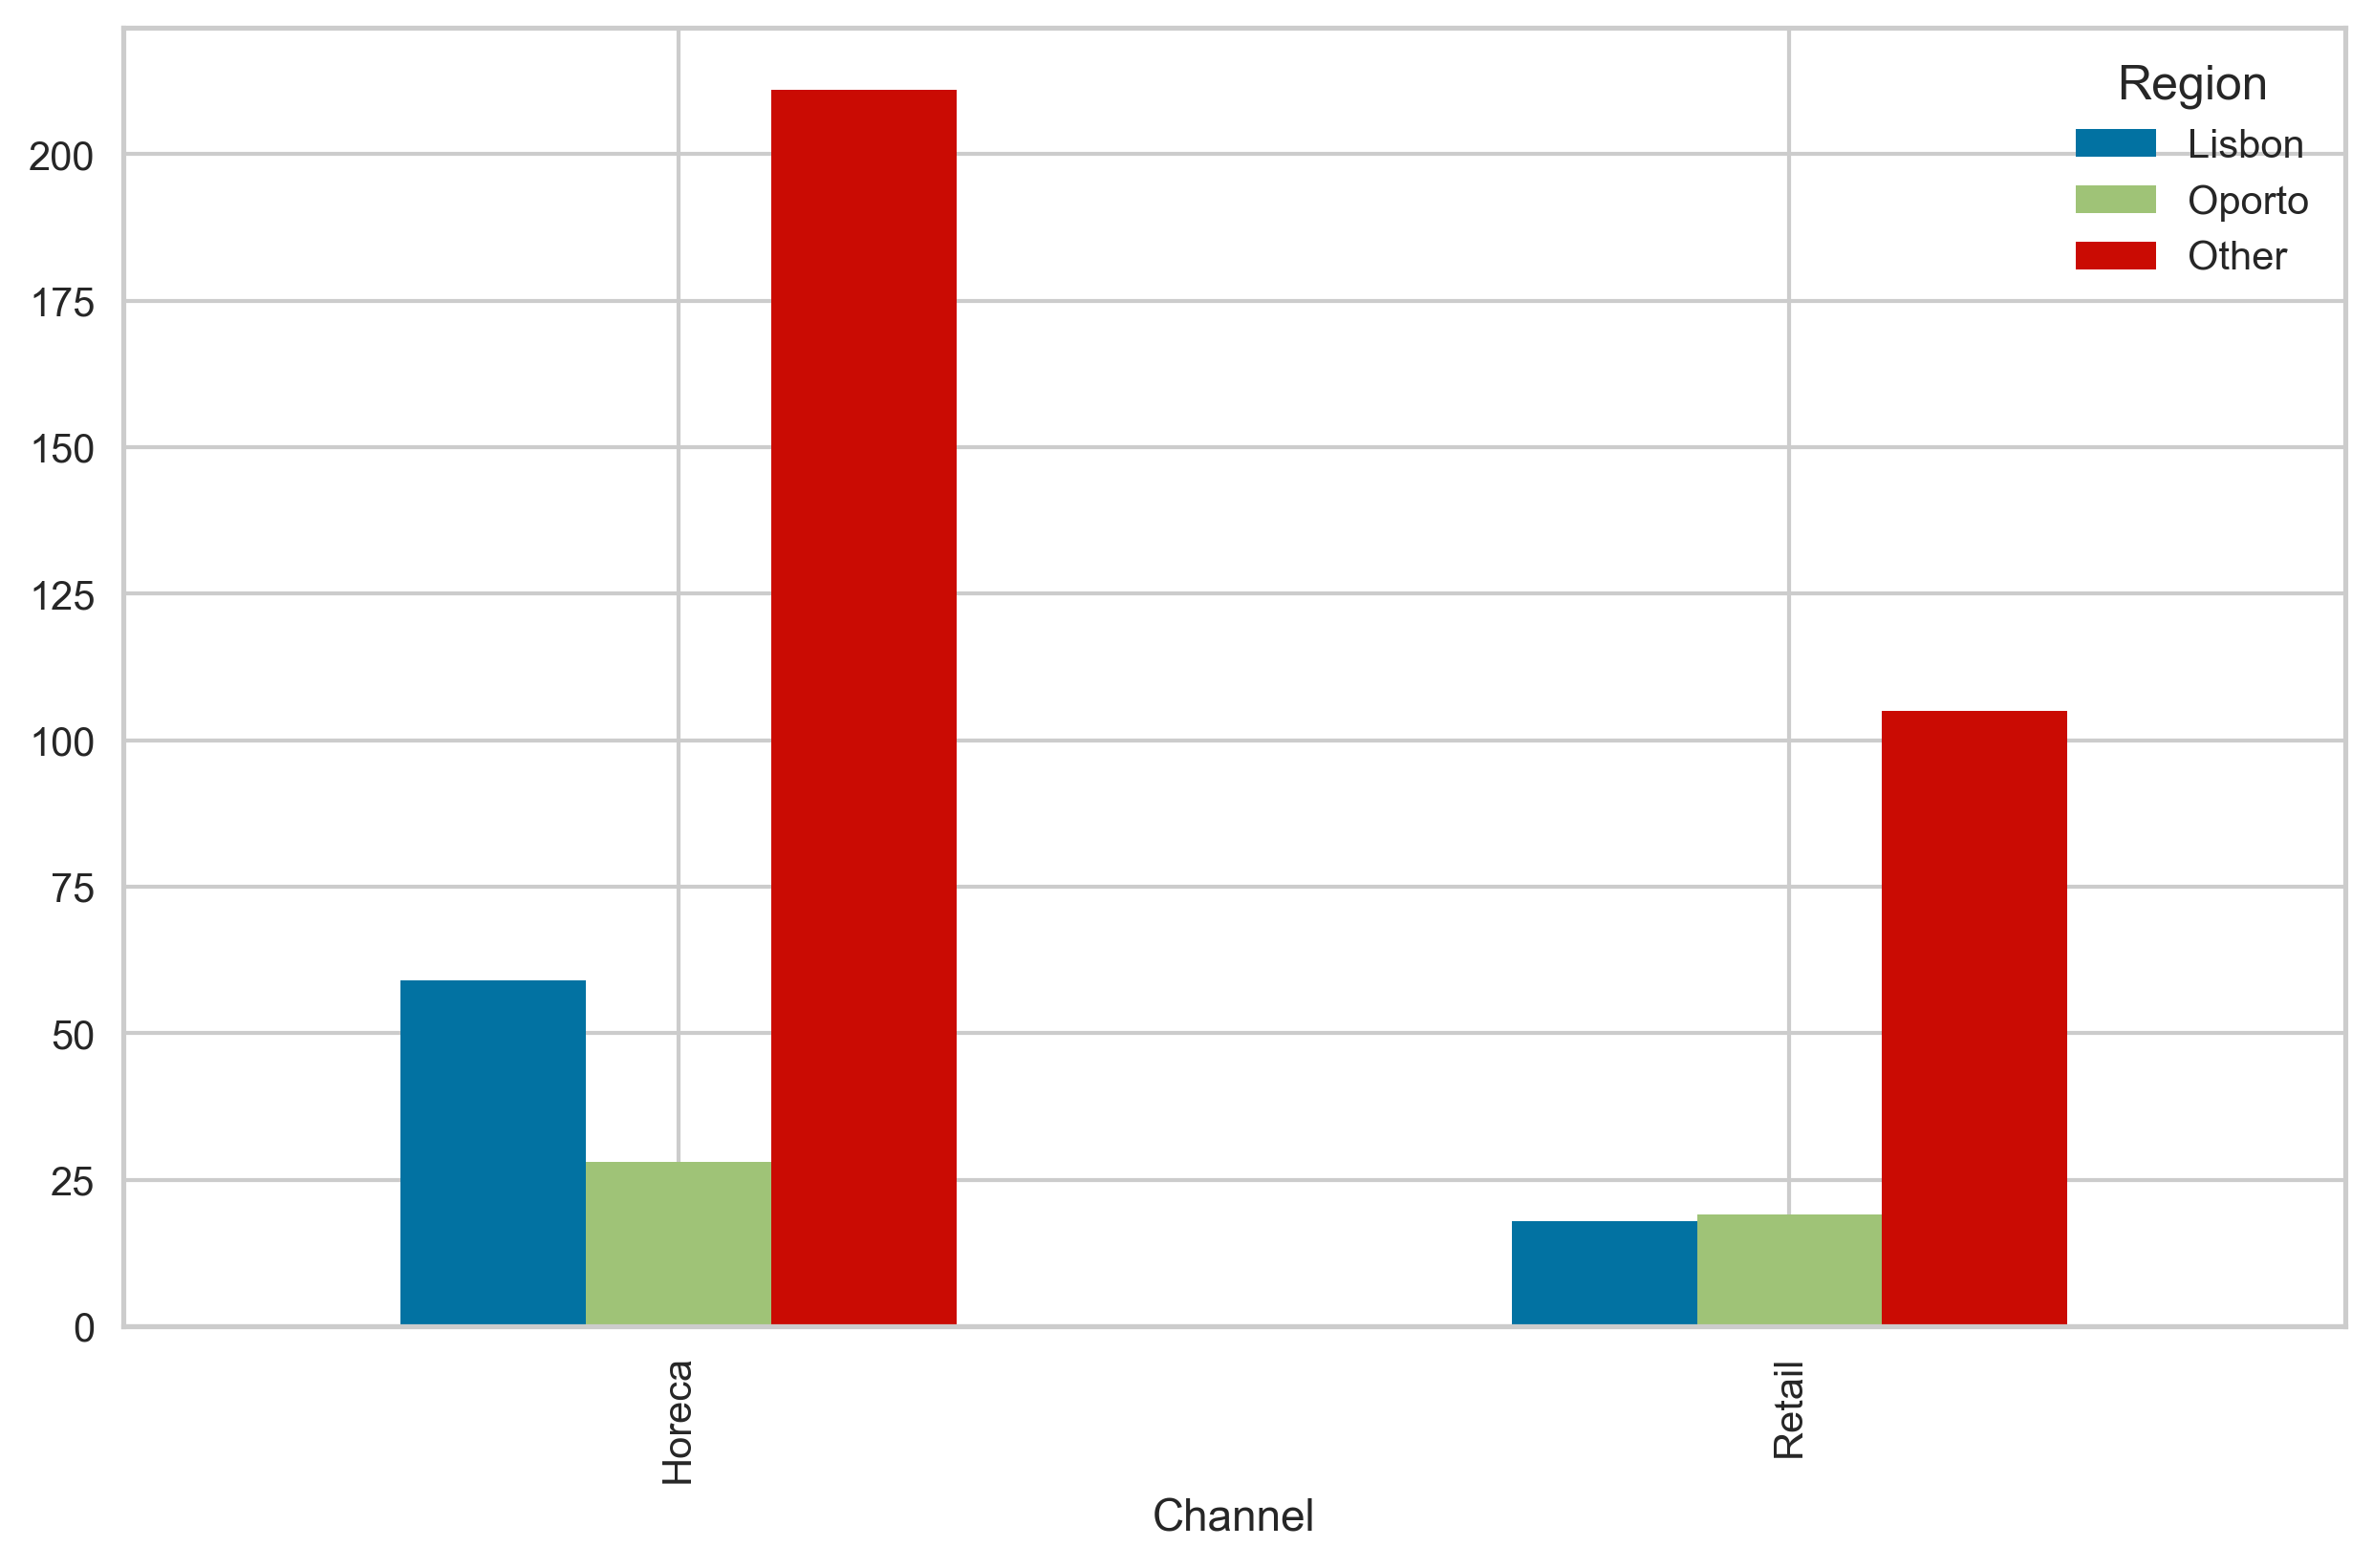

In [155]:
group = data.groupby(['Channel', 'Region']).size().unstack()
group.plot(kind='bar', figsize=(10,6))

plt.show()

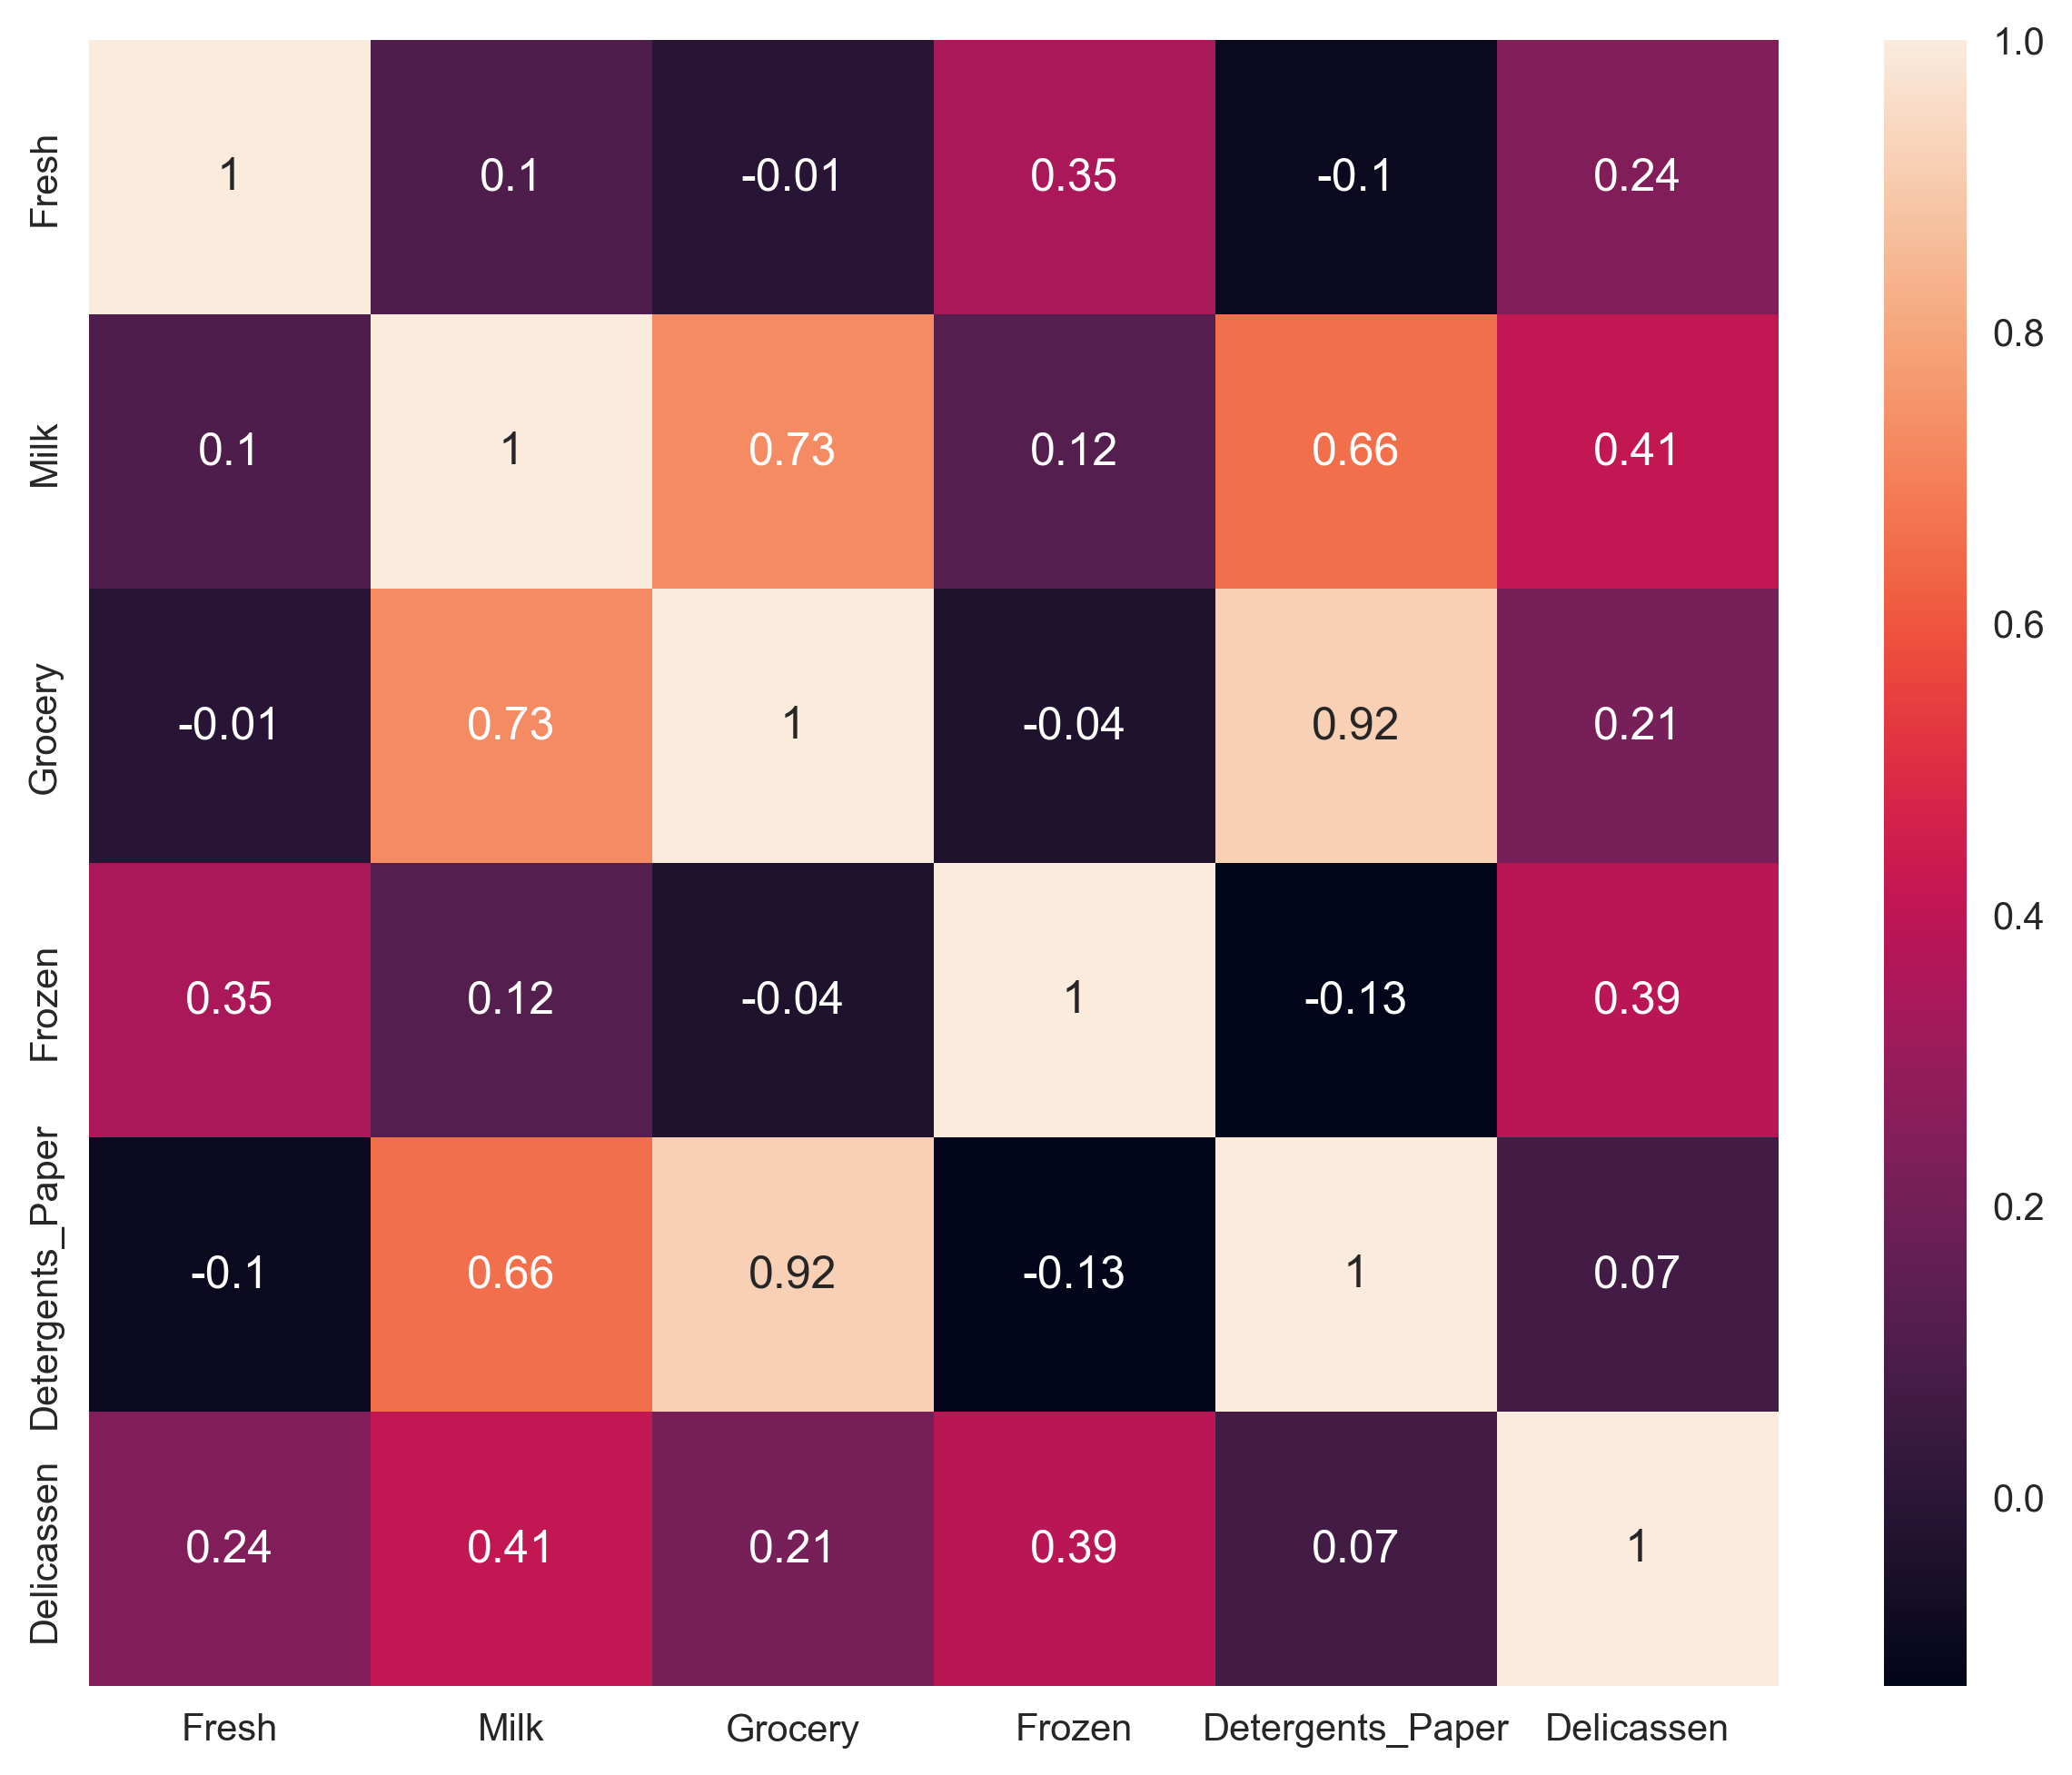

In [159]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr().round(decimals=2), annot=True)

plt.show()

In [ ]:
cols = ['Fresh', 'Milk', 'Frozen', 'Detergents_Paper', 'Delicassen']

sns.pairplot(data, vars=cols, hue='Channel', palette='tab10')

plt.show()

### Initializing the PyCaret Environment

In [137]:
anomaly = setup(data, transformation = False)

### Creating the Model

In [204]:
model = create_model('lof', fraction = 0.15)

### Assigning the Model

In [216]:
data_assigned = assign_model(model)

data_assigned.head(30)

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0         2       3  12669   9656     7561     214              2674   
1         2       3   7057   9810     9568    1762              3293   
2         2       3   6353   8808     7684    2405              3516   
3         1       3  13265   1196     4221    6404               507   
4         2       3  22615   5410     7198    3915              1777   
5         2       3   9413   8259     5126     666              1795   
6         2       3  12126   3199     6975     480              3140   
7         2       3   7579   4956     9426    1669              3321   
8         1       3   5963   3648     6192     425              1716   
9         2       3   6006  11093    18881    1159              7425   
10        2       3   3366   5403    12974    4400              5977   
11        2       3  13146   1124     4523    1420               549   
12        2       3  31714  12319    11757     287              3881   
13        2       3  21217   6208    14982    3095              6707   
14        2       3  24653   9465    12091     294              5058   
15        1       3  10253   1114     3821     397               964   
16        2       3   1020   8816    12121     134              4508   
17        1       3   5876   6157     2933     839               370   
18        2       3  18601   6327    10099    2205              2767   
19        1       3   7780   2495     9464     669              2518   
20        2       3  17546   4519     4602    1066              2259   
21        1       3   5567    871     2010    3383               375   
22        1       3  31276   1917     4469    9408              2381   
23        2       3  26373  36423    22019    5154              4337   
24        2       3  22647   9776    13792    2915              4482   
25        2       3  16165   4230     7595     201              4003   
26        1       3   9898    961     2861    3151               242   
27        1       3  14276    803     3045     485               100   
28        2       3   4113  20484    25957    1158              8604   
29        1       3  43088   2100     2609    1200              1107   

    Delicassen  Anomaly  Anomaly_Score  
0         1338        0       1.107687  
1         1776        0       1.027102  
2         7844        1       1.398439  
3         1788        0       1.200384  
4         5185        0       1.164052  
5         1451        0       1.184313  
6          545        0       1.130491  
7         2566        0       1.013751  
8          750        0       1.201904  
9         2098        0       1.053333  
10        1744        0       1.059052  
11         497        0       1.028446  
12        2931        1       1.293281  
13         602        0       1.201872  
14        2168        0       1.204291  
15         412        0       1.035913  
16        1080        0       0.981243  
17        4478        1       1.458161  
18        3181        0       1.104363  
19         501        0       1.091968  
20        2124        0       1.088944  
21         569        0       1.015027  
22        4334        0       1.142473  
23       16523        1       2.249573  
24        5778        0       1.231737  
25          57        0       1.101603  
26         833        0       0.986800  
27         518        0       1.003383  
28        5206        0       1.222064  
29         823        0       1.162238

In [206]:
data_inlier = data_assigned.query('Anomaly == 0')

data_inlier.skew()

Channel             0.797196
Region             -1.321303
Fresh               1.473339
Milk                1.478488
Grocery             1.494453
Frozen              1.702528
Detergents_Paper    1.741610
Delicassen          2.065528
Anomaly             0.000000
Anomaly_Score       0.432630
dtype: float64

### Plotting the Model

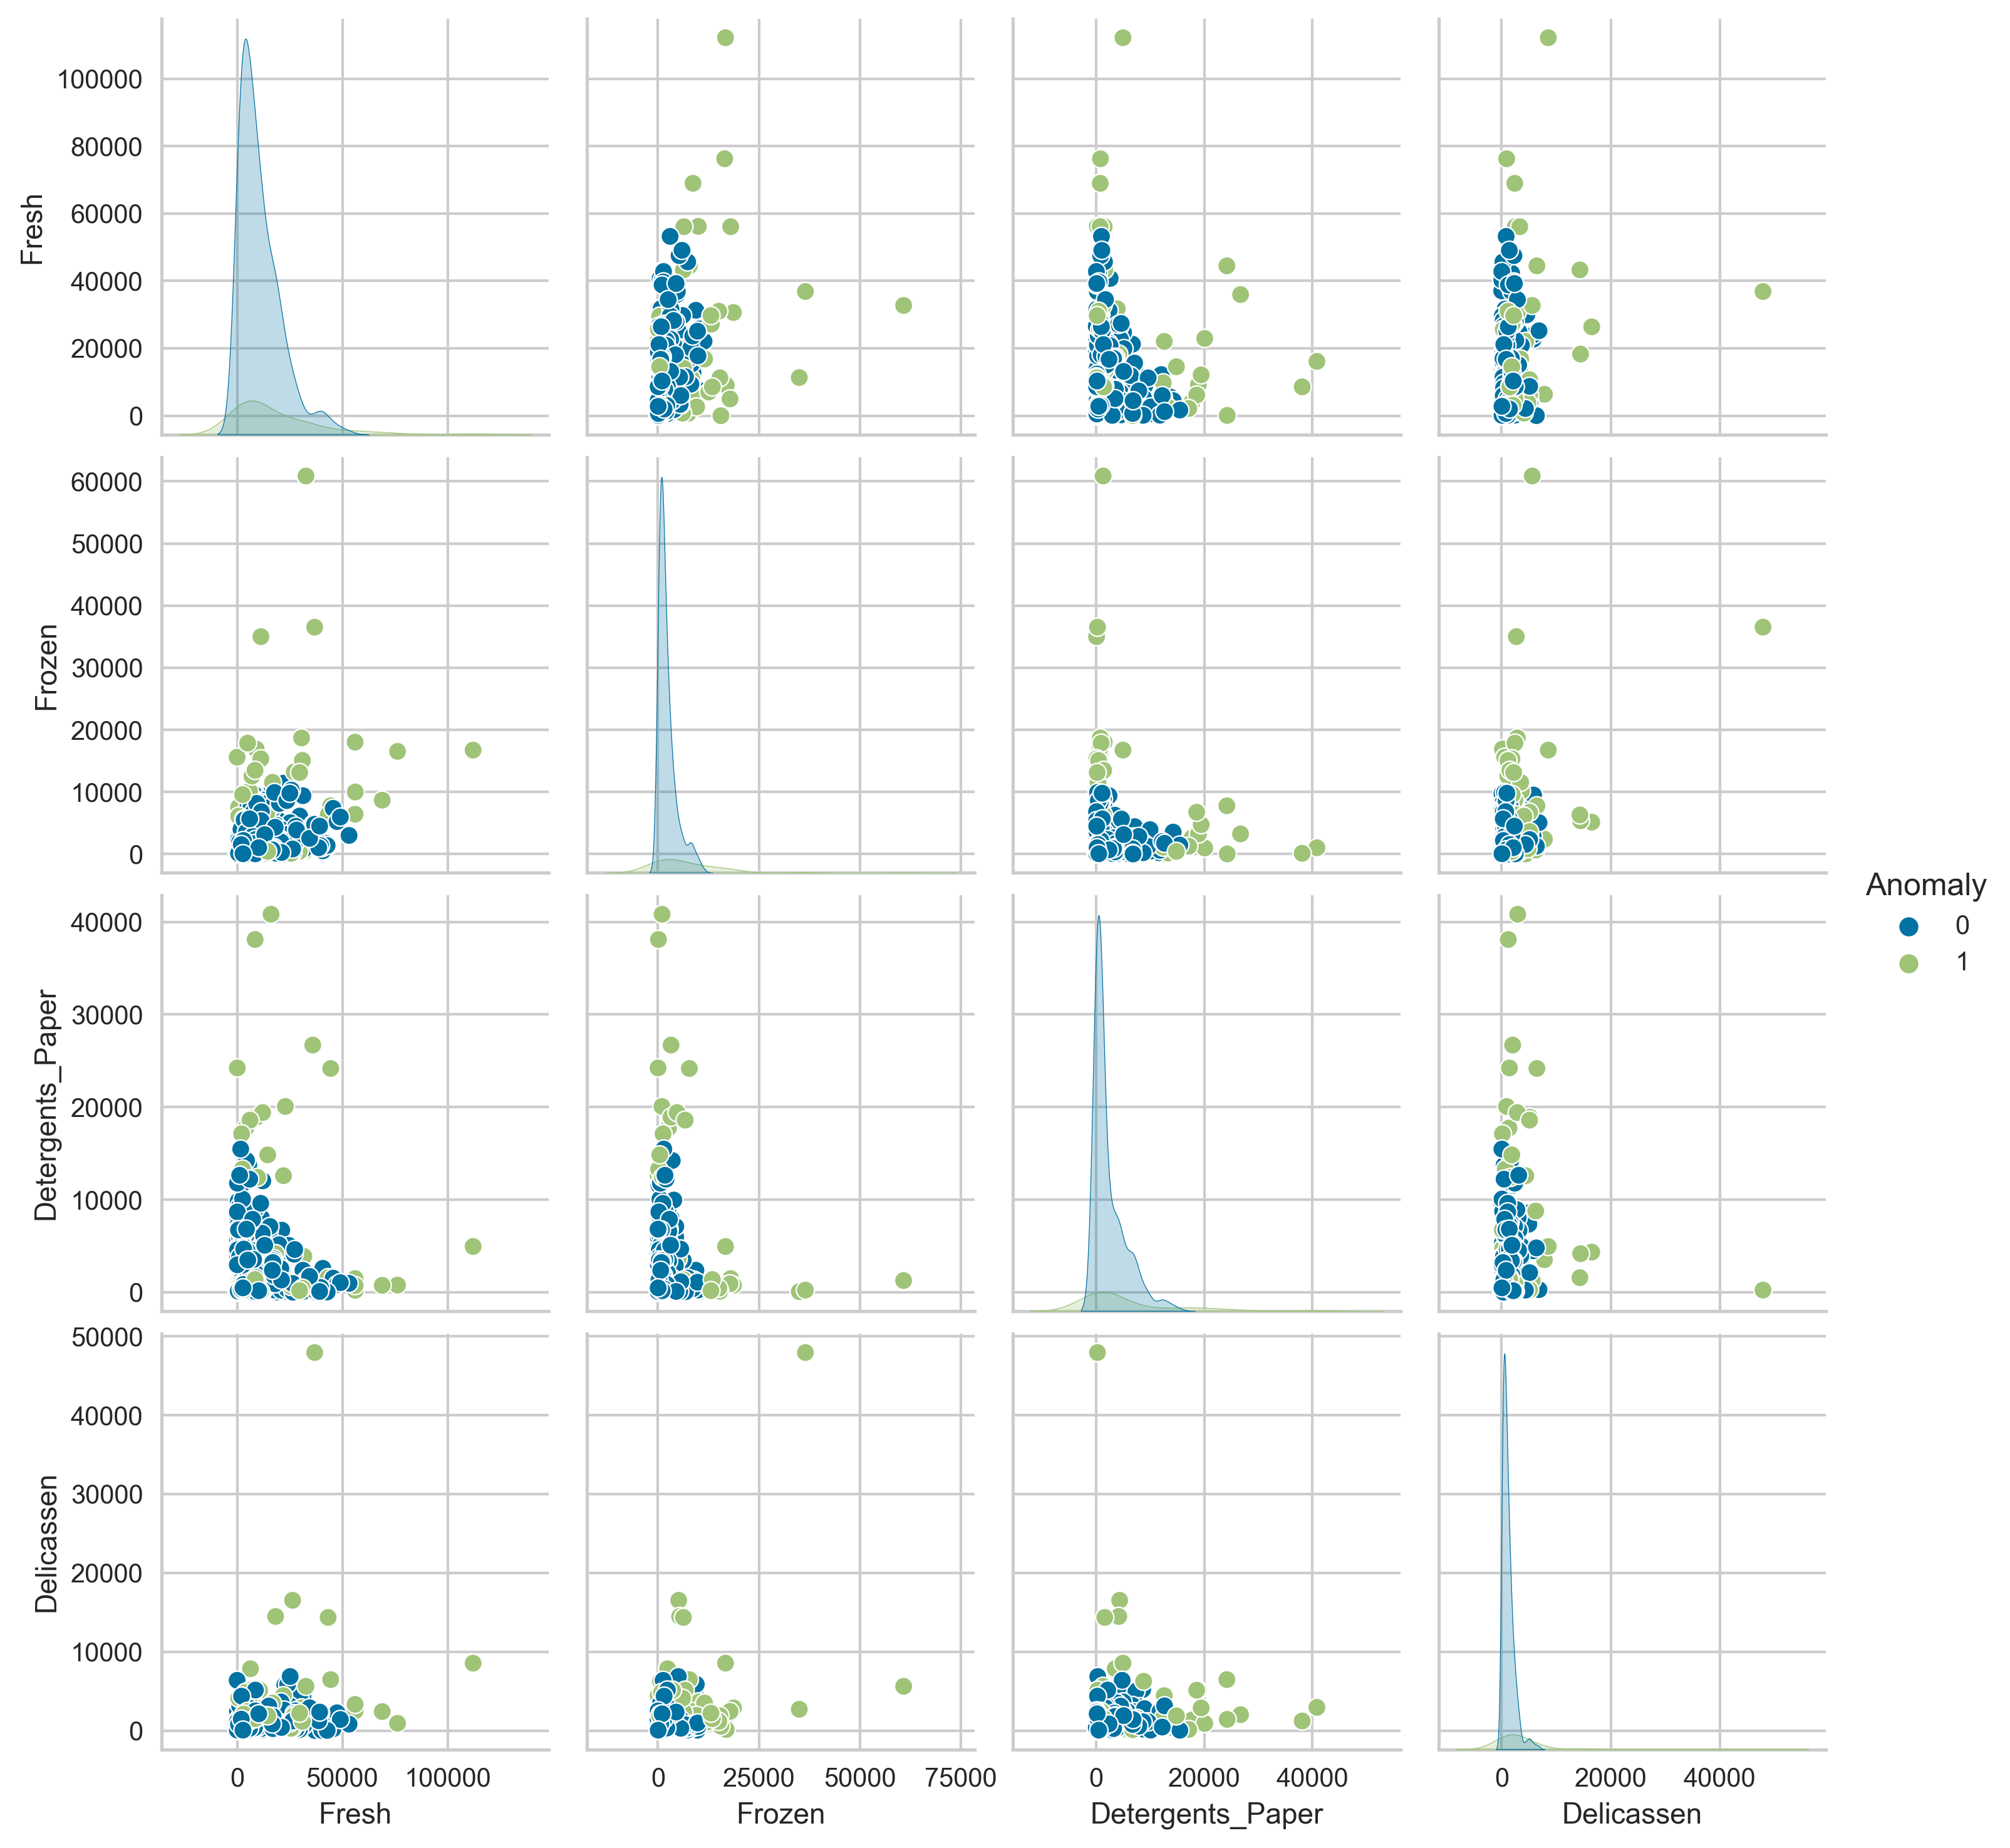

In [212]:
cols = ['Fresh', 'Milk', 'Frozen', 'Detergents_Paper', 'Delicassen']

sns.pairplot(data_, vars=cols, hue='Anomaly', diag_kind = 'hist')

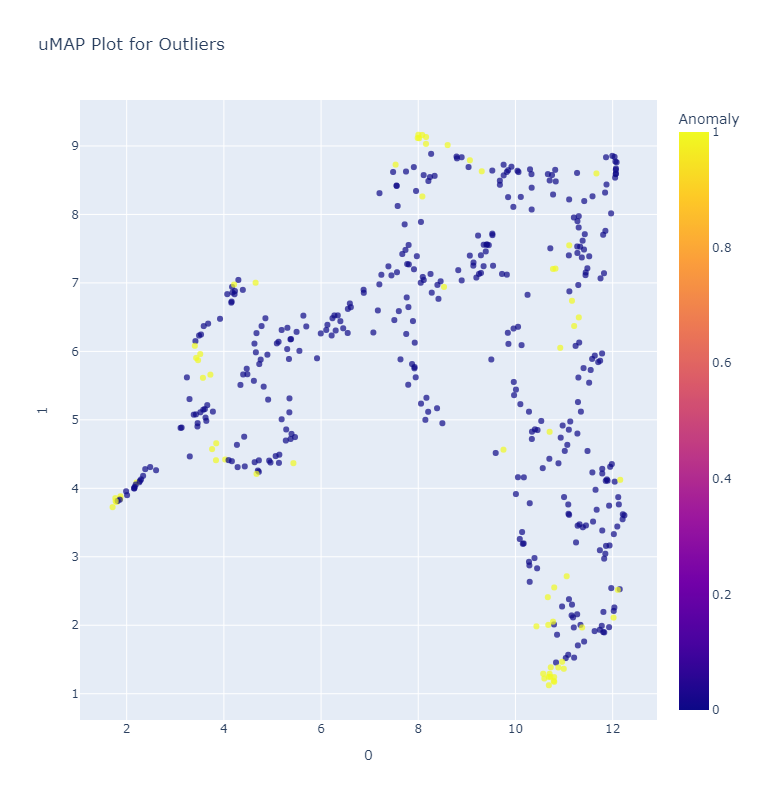

In [109]:
plot_model(model, 'umap')